In [19]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import numpy as np
import scipy.stats as sp
from scipy.stats import norm
from scipy.integrate import simpson
from scipy.linalg import  cholesky
import matplotlib.pyplot as plt
import sympy

# Task 1: Probability

### A. (5 pts) Plot the probability density function p(x) of a one dimensional Gaussian distribution N (x; 1, 1).

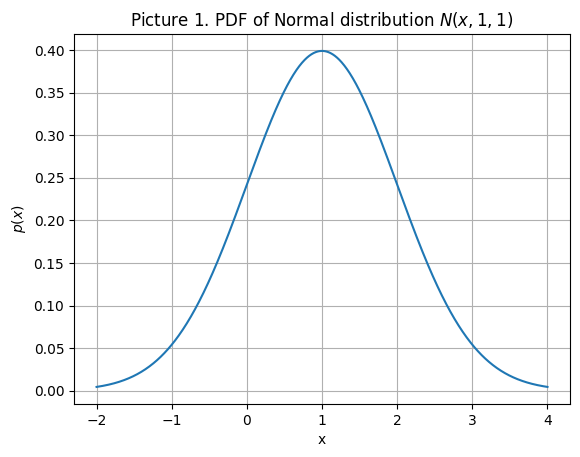

In [20]:
x = np.linspace(-2, 4, 1000)
mu_prior = 1
sigma_prior = 1

prior_pdf = norm.pdf(x, mu_prior, sigma_prior)

plt.plot(x, prior_pdf)

plt.title(r'Picture 1. PDF of Normal distribution $N(x, 1, 1)$')
plt.xlabel("x")
plt.ylabel('$p(x)$')
plt.grid(True)
plt.show()

### B. Calculate the probability mass that the random variable X is less than 0.

In [21]:
norm.cdf(0, 1, 1)

0.15865525393145707

##### C: Consider the new observation variable z, it gives information about the variable x by the likelihood function p(z|x) = N(z; x; $\sigma^2$), with variance $\sigma^2$ = 0,2. Apply the Bayes’ theorem to derive the posterior distribution, p(x|z), given an observation z = 0,75 and plot it. For a better comparison, plot the prior distribution, p(x), too.

Given:
- **Prior Distribution**: $p(x) = N(x; 1, 1)$, with mean $\mu = 1$ and variance $\sigma_x^2 = 1$.
- **Likelihood Function**: $p(z|x) = N(z; x, \sigma_z^2)$, with variance $\sigma_z^2 = 0.2$.
- **Observation**: $z = 0.75$.

### Applying Bayes' Theorem to Derive the Posterior Distribution

1. **Bayes' Theorem**:
   The posterior distribution $p(x|z)$ is proportional to the likelihood of the observation given the state times the prior probability of the state:
   $$p(x|z) = \frac{p(x,z)}{p(z)} = \frac{p(z|x) \times p(x)}{p(z)}$$

2. **Likelihood Function**:
   Given as $p(z|x) = \frac{1}{\sqrt{2\pi\sigma_z^2}} e^{-\frac{(z-x)^2}{2\sigma_z^2}}$.

3. **Prior Distribution**:
   Specified as $p(x) = \frac{1}{\sqrt{2\pi\sigma_x^2}} e^{-\frac{(x-\mu)^2}{2\sigma_x^2}}$, with $\mu = 1$ and $\sigma_x^2 = 1$.

4. **Posterior Distribution** ($p(x|z)$):
   The product of the likelihood and the prior, normalized by $p(z)$, leads to a Gaussian distribution where the mean and variance are updated as follows:

   - **Posterior Mean** ($\mu_{post}$):
     $$\mu_{post} = \frac{\sigma_z^2 \mu + \sigma_x^2 z}{\sigma_x^2 + \sigma_z^2}$$

   - **Posterior Variance** ($\sigma_{post}^2$):
     $$\sigma_{post}^2 = \left(\frac{1}{\sigma_x^2} + \frac{1}{\sigma_z^2}\right)^{-1}$$

   Substituting the given values ($\mu = 1$, $\sigma_x^2 = 1$, $\sigma_z^2 = 0.2$, and $z = 0.75$):

   - $\mu_{post} = \frac{0.2 \times 1 + 1 \times 0.75}{1 + 0.2} \approx 0.792$
   - $\sigma_{post}^2 = \left(\frac{1}{1} + \frac{1}{0.2}\right)^{-1} \approx 0.167$

### Conclusion

The posterior distribution $p(x|z)$ for the observation $z = 0.75$ with a Gaussian prior $N(x; 1, 1)$ and Gaussian likelihood function is $N(0.792, 0.167)$. 


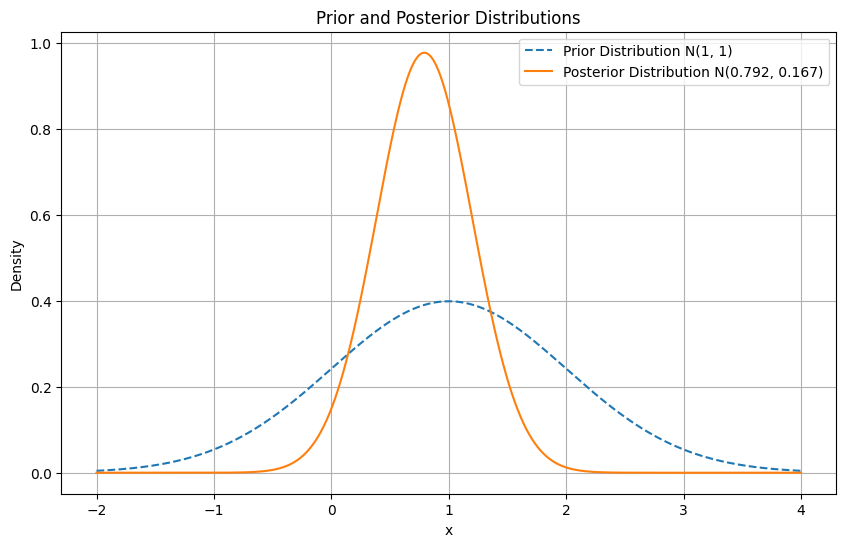

In [22]:
mu_likelihood = 0.75  # From the observation z
sigma_likelihood = np.sqrt(0.2)
mu_posterior = (sigma_likelihood**2 * mu_prior + sigma_prior**2 * mu_likelihood) / (sigma_prior**2 + sigma_likelihood**2)
sigma_posterior = np.sqrt((1 / sigma_prior**2 + 1 / sigma_likelihood**2)**-1)

# Posterior Distribution
posterior_pdf = norm.pdf(x, mu_posterior, sigma_posterior)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, prior_pdf, label='Prior Distribution N(1, 1)', linestyle='--')
plt.plot(x, posterior_pdf, label=f'Posterior Distribution N({mu_posterior:.3f}, {sigma_posterior**2:.3f})', linestyle='-')
plt.title('Prior and Posterior Distributions')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Multivariate Gaussian

#### A.  Write the function plot2dcov which plots the 2d contour given three core parameters: mean,covariance, and the iso-contour value k. 

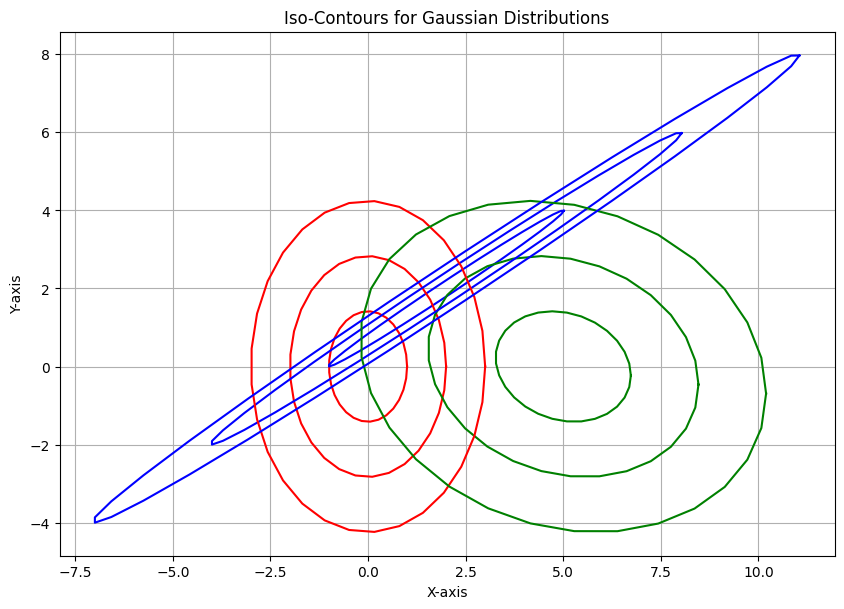

In [23]:
def plot2dcov(mean, cov, k, color='blue', num_points=30):
    """
    Plots a 2D contour given the mean, covariance matrix, and iso-contour value k.

    Parameters:
    - mean: The mean vector of the Gaussian distribution.
    - cov: The covariance matrix of the Gaussian distribution.
    - k: The iso-contour value (e.g., 1, 2, 3 for 1-sigma, 2-sigma, 3-sigma contours).
    - color: The color of the contour plot.
    - num_points: The number of points to generate for the contour.
    """
    # Generate points on a unit circle
    theta = np.linspace(0, 2 * np.pi, num_points)
    circle = np.array([np.cos(theta), np.sin(theta)])
    
    # Cholesky decomposition for the covariance matrix
    A = cholesky(cov, lower=True)  # Use lower=True to get A · A^T = cov
    
    # Scale and transform the unit circle to the ellipse defined by the covariance matrix
    ellipse = mean[:, np.newaxis] + k * A.dot(circle)
    
    # Plot the ellipse
    plt.plot(ellipse[0, :], ellipse[1, :], color=color)

# Define means and covariance matrices for the Gaussian distributions
mean1 = np.array([0, 0])
cov1 = np.array([[1, 0], [0, 2]])

mean2 = np.array([5, 0])
cov2 = np.array([[3, -0.4], [-0.4, 2]])

mean3 = np.array([2, 2])
cov3 = np.array([[9.1, 6], [6, 4]])

plt.figure(figsize=(10, 10))

# Plot 1, 2, 3-sigma contours for each Gaussian distribution
for k in [1, 2, 3]:
    plot2dcov(mean1, cov1, k, color='red')
    plot2dcov(mean2, cov2, k, color='green')
    plot2dcov(mean3, cov3, k, color='blue')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Iso-Contours for Gaussian Distributions')
plt.grid(True)
plt.show()


### B. Write the equation of sample mean and sample covariance of a set of points {xi}, in vector form as was shown during the lecture.

Sample mean in vector form: 
$$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i = \begin{bmatrix} \bar{x}_{1} \\ ... \\ \bar{x}_{i} \\ ... \\ \bar{x}_{N}\end{bmatrix}$$

Sample covariance in vector form:
$$ \Sigma_{x} = \frac{1}{N-1} \displaystyle\sum_{i=1}^{N} (x_{i} - \bar{x})(x_{i} - \bar{x})^T = \begin{bmatrix} \sigma_{x_1 x_1} & \sigma_{x_1 x_2} & ... & \sigma_{x_1 x_N} \\ \sigma_{x_2 x_1} & \sigma_{x_2 x_2} & ... & \sigma_{x_2 x_N} \\ ... & ... & ... & ... & \\ \sigma_{x_N x_1} & \sigma_{x_N x_2} & ... & \sigma_{x_N x_N}  \end{bmatrix}$$

### C. (15 pts) Draw random samples from a multivariate normal distribution.

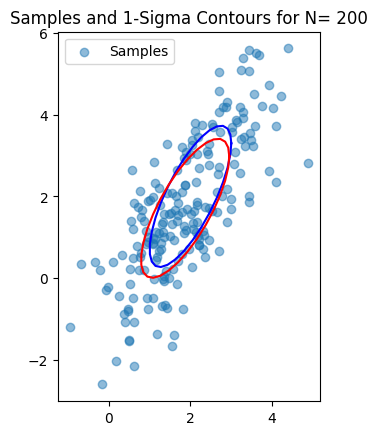

Sample Mean: [1.86971597 1.70836835]
Sample Covariance:
 [[1.16730349 1.3746042 ]
 [1.3746042  2.90361411]]


In [24]:
from numpy.random import normal

def draw_samples_and_plot(mean, cov, plot, n_samples=200):

    A = cholesky(cov, lower=True)
    z = normal(size=(n_samples, len(mean)))
    samples = mean + z.dot(A.T)
    
    sample_mean = np.mean(samples, axis=0)
    sample_cov = np.cov(samples, rowvar=False)
    
    if(plot==True):
        # Plot samples
        plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Samples')

        # Plot true 1-sigma contour
        plot2dcov(mean, cov, k=1, color='blue')
    
        plot2dcov(sample_mean, sample_cov, k=1, color='red')

        plt.legend()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f'Samples and 1-Sigma Contours for N= {n_samples}')
        plt.show()

    return samples, sample_mean, sample_cov

# Define the mean and covariance of the distribution
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])

# Draw and plot samples and their 1-sigma contour
_, sample_mean, sample_cov = draw_samples_and_plot(mean, cov, True, 200)

print("Sample Mean:", sample_mean)
print("Sample Covariance:\n", sample_cov)

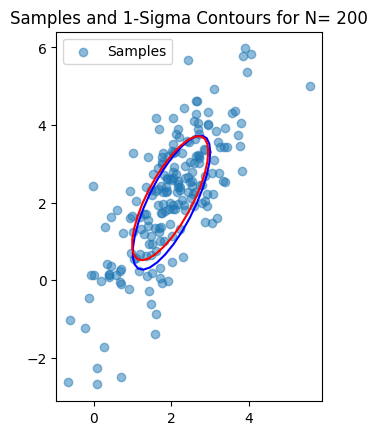

Sample Mean: [1.9663828  2.11359759]
Sample Covariance:
 [[0.96568687 1.17398442]
 [1.17398442 2.56608628]]


In [25]:
_, sample_mean, sample_cov = draw_samples_and_plot(mean, cov, True, 200)

print("Sample Mean:", sample_mean)
print("Sample Covariance:\n", sample_cov)

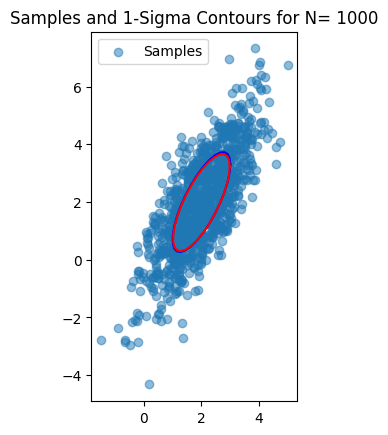

Sample Mean: [1.99893012 1.98266448]
Sample Covariance:
 [[0.96397992 1.23106332]
 [1.23106332 2.83866006]]


In [26]:
_, sample_mean, sample_cov = draw_samples_and_plot(mean, cov, True, 1000)

print("Sample Mean:", sample_mean)
print("Sample Covariance:\n", sample_cov)

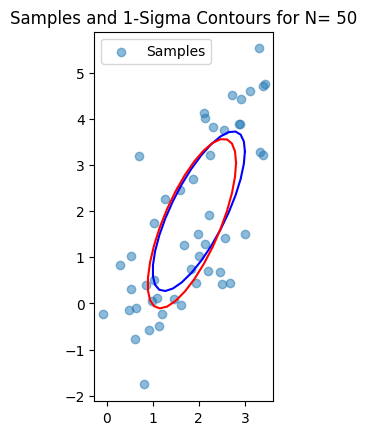

Sample Mean: [1.84991679 1.73080045]
Sample Covariance:
 [[0.91749095 1.26495498]
 [1.26495498 3.38044483]]


In [27]:
_, sample_mean, sample_cov = draw_samples_and_plot(mean, cov, True, 50)

print("Sample Mean:", sample_mean)

print("Sample Covariance:\n", sample_cov)

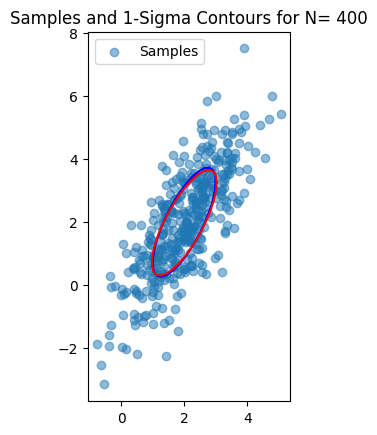

Sample Mean: [2.0017561  1.97988007]
Sample Covariance:
 [[1.06084383 1.31228635]
 [1.31228635 2.81699842]]


In [28]:
_, sample_mean, sample_cov = draw_samples_and_plot(mean, cov, True, 400)

print("Sample Mean:", sample_mean)
print("Sample Covariance:\n", sample_cov)

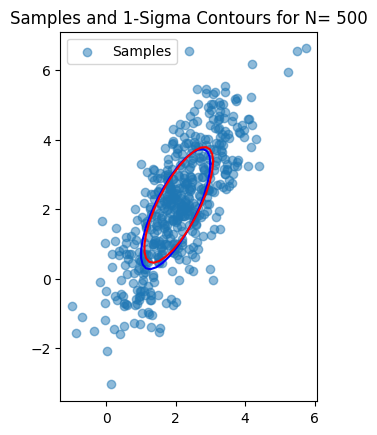

Sample Mean: [2.08822889 2.12117504]
Sample Covariance:
 [[0.98200951 1.23984904]
 [1.23984904 2.78139479]]


In [29]:
_, sample_mean, sample_cov = draw_samples_and_plot(mean, cov, True, 500)

print("Sample Mean:", sample_mean)
print("Sample Covariance:\n", sample_cov)

##### Comment: The higher the amount of samples the more accurate results we can obtain regarding the distribution parameters.

# Task 3: Covariance Propagation

### A. Write the equations corresponding to the mean and covariance after a single propagation of the holonomic platform.

The mean of the system after a single time step is:

$$
\mu_t = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \mu_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} u_t
$$

where $ \mu_{t-1} $ is the mean of the state at time $ t-1 $, and $ u_t $ is the control input at time $t$.

The covariance after a single time step is:

$$
\Sigma_t = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \Sigma_{t-1} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}^T + \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}
$$

where $ \Sigma_{t-1} $ is the covariance of the state at time $ t-1 $, and the second term is the process noise covariance matrix.


### B. How can we use this result iteratively?

To use the result from part A iteratively for predicting the future state of an omni-directional robotic platform, we follow these steps:

1. **Initialization**: Begin with an initial state estimate $ \mu_0 $ and covariance $ \Sigma_0 $.

2. **State Propagation**: At each time step $ t $, the state estimate and covariance are updated using the process model. The update equations are:

    Update the state estimate (mean):
      $$ \mu_t = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \mu_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} u_t $$

    Update the covariance estimate:
      $$ \Sigma_t = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \Sigma_{t-1} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}^T + \mathbf{Q} $$

    Here, $ \mu_{t-1} $ is the previous state estimate, $ u_t $ is the control input at time $ t $, $ \Sigma_{t-1} $ is the previous covariance estimate, and $ \mathbf{Q} $ is the process noise covariance matrix.

3. **Iterative Update**: This process is repeated for each time step, using the new state estimate and covariance as the starting point for the next time step.

##### C.  Draw the propagation state PDF (1-sigma iso-contour) for times indexes $t = 0, . . . , 5$ and the control sequence $u_t = [3, 0]^{T}$ for all times $t$

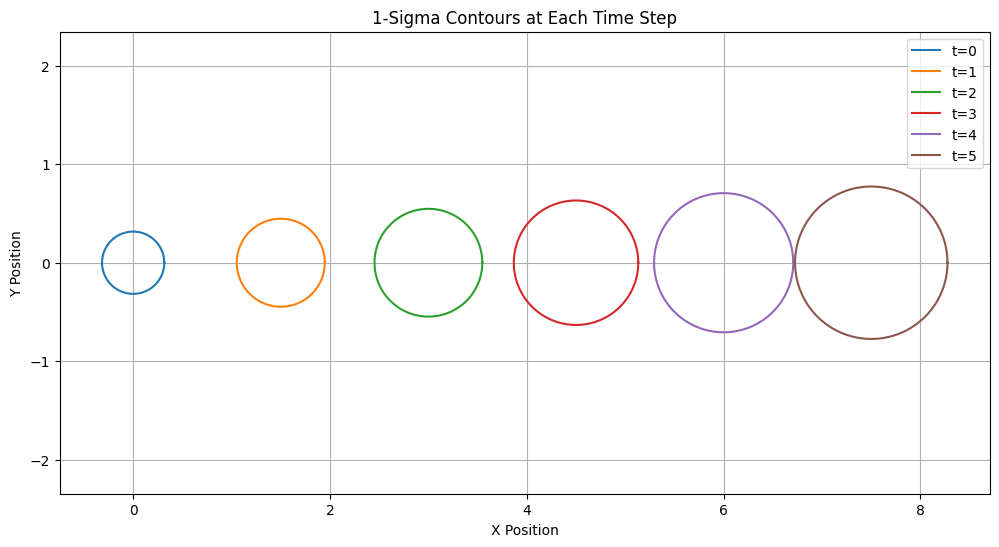

In [30]:
def plot_1_sigma(mean, cov, label=None):
    theta = np.linspace(0, 2 * np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])  # Unit circle
    # Cholesky decomposition of the covariance
    cholesky_decomp = cholesky(cov, lower=True)
    # Transform the unit circle into the ellipse defined by the covariance
    ellipse = mean[:, None] + cholesky_decomp @ circle

    plt.plot(ellipse[0, :], ellipse[1, :], label=label)

mean_state = np.array([0, 0])  # Initial mean state
cov_state = np.array([[0.1, 0], [0, 0.1]])  # Initial covariance
control_input = np.array([3, 0])  # Control input (constant for all t)
delta_t = 0.5  # Time step
Q = np.array([[0.1, 0], [0, 0.1]])  # Process noise covariance

plt.figure(figsize=(12, 6))

# Simulate and plot for time indices t = 0,...,5
for t in range(6):
    # Plot the 1-sigma contour for the current state
    plot_1_sigma(mean_state, cov_state, label=f't={t}')
    
    # Propagate the state mean using the control input
    mean_state = mean_state + delta_t * control_input
    
    # Propagate the state covariance
    cov_state = cov_state + Q

# Set plot attributes
plt.title('1-Sigma Contours at Each Time Step')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

### D.

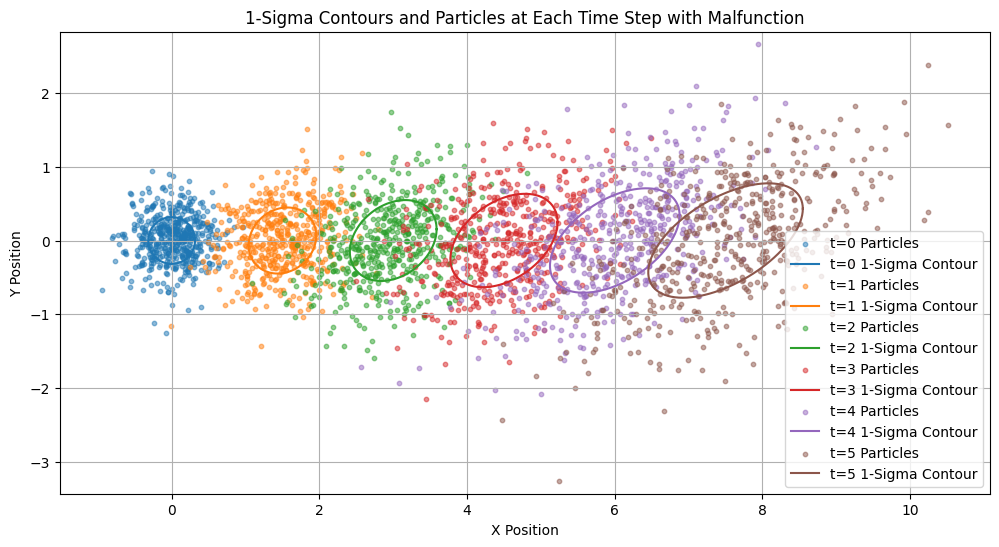

In [31]:
# The state transition matrix has changed
state_transition_matrix = np.array([[1, 0.3], [0, 1]])

plt.figure(figsize=(12, 6))

mean_state = np.array([0, 0])  # Initial mean state (unchanged)
cov_state = np.array([[0.1, 0], [0, 0.1]])  # Initial covariance (unchanged)

# Draw and plot 500 particles for each time step
for t in range(6):
    # Draw particles from the current Gaussian distribution
    particles = np.random.multivariate_normal(mean_state, cov_state, 500)
    plt.scatter(particles[:, 0], particles[:, 1], alpha=0.5, label=f't={t} Particles', s=10)

    # Plot the 1-sigma contour for the current state
    plot_1_sigma(mean_state, cov_state, label=f't={t} 1-Sigma Contour')
    
    # Propagate the state mean using the updated state transition matrix and control input
    mean_state = state_transition_matrix @ mean_state + delta_t * control_input
    
    # Propagate the state covariance
    cov_state = state_transition_matrix @ cov_state @ state_transition_matrix.T + Q

plt.title('1-Sigma Contours and Particles at Each Time Step with Malfunction')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

### E.

In [32]:
theta, v, w, x, y, deltat= sympy.symbols('theta v w x y \delta{t}')

def jacobian(a, b):

    n = len(a)
    m = len(b)

    J = sympy.zeros(n, m)

    for i in range(n):
        for j in range(m):
            # Get derivative with related respect
            J[i, j] = a[i].diff(b[j])
    return sympy.simplify(J)

def compute_num(func, params, num_params):

    # Lambdify the given function
    func_num = sympy.lambdify(params, func)
    # Calculate numerical values
    func_num = func_num(*num_params)
    return func_num

# Dynamic matrix
A = np.array([  [1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]])

# Initial state parameters
mean_X_0 = np.array((0, 0, 0))

cov_X_0 = np.array([ [0.1, 0, 0],
                     [0, 0.1, 0],
                     [0, 0, 0.5] ])

# State vector
X = sympy.Matrix((x, y, theta))

# Control sequence 
u = sympy.Matrix((v, w))

# Time step
dt = 0.5  

# Input gain matrix 
B = sympy.Matrix([  [sympy.cos(theta)*deltat, 0],    
                    [sympy.sin(theta)*deltat, 0],
                    [0, deltat] ])

# Noise model
mean_noise = np.array((0, 0, 0))

cov_noise = np.array([ [0.2, 0, 0],
                          [0, 0.2, 0],
                          [0, 0, 0.1] ])

# Compute J_x
J_x = jacobian(B*u, X)

# Propagate mean
# Define data structure for the state propagation
mean_prop = np.zeros((6, 3))
mean_prop[0] = mean_X_0

cov_prop = np.zeros((6, 3, 3))
cov_prop[0] = cov_X_0

u = np.array((3, 1.5))

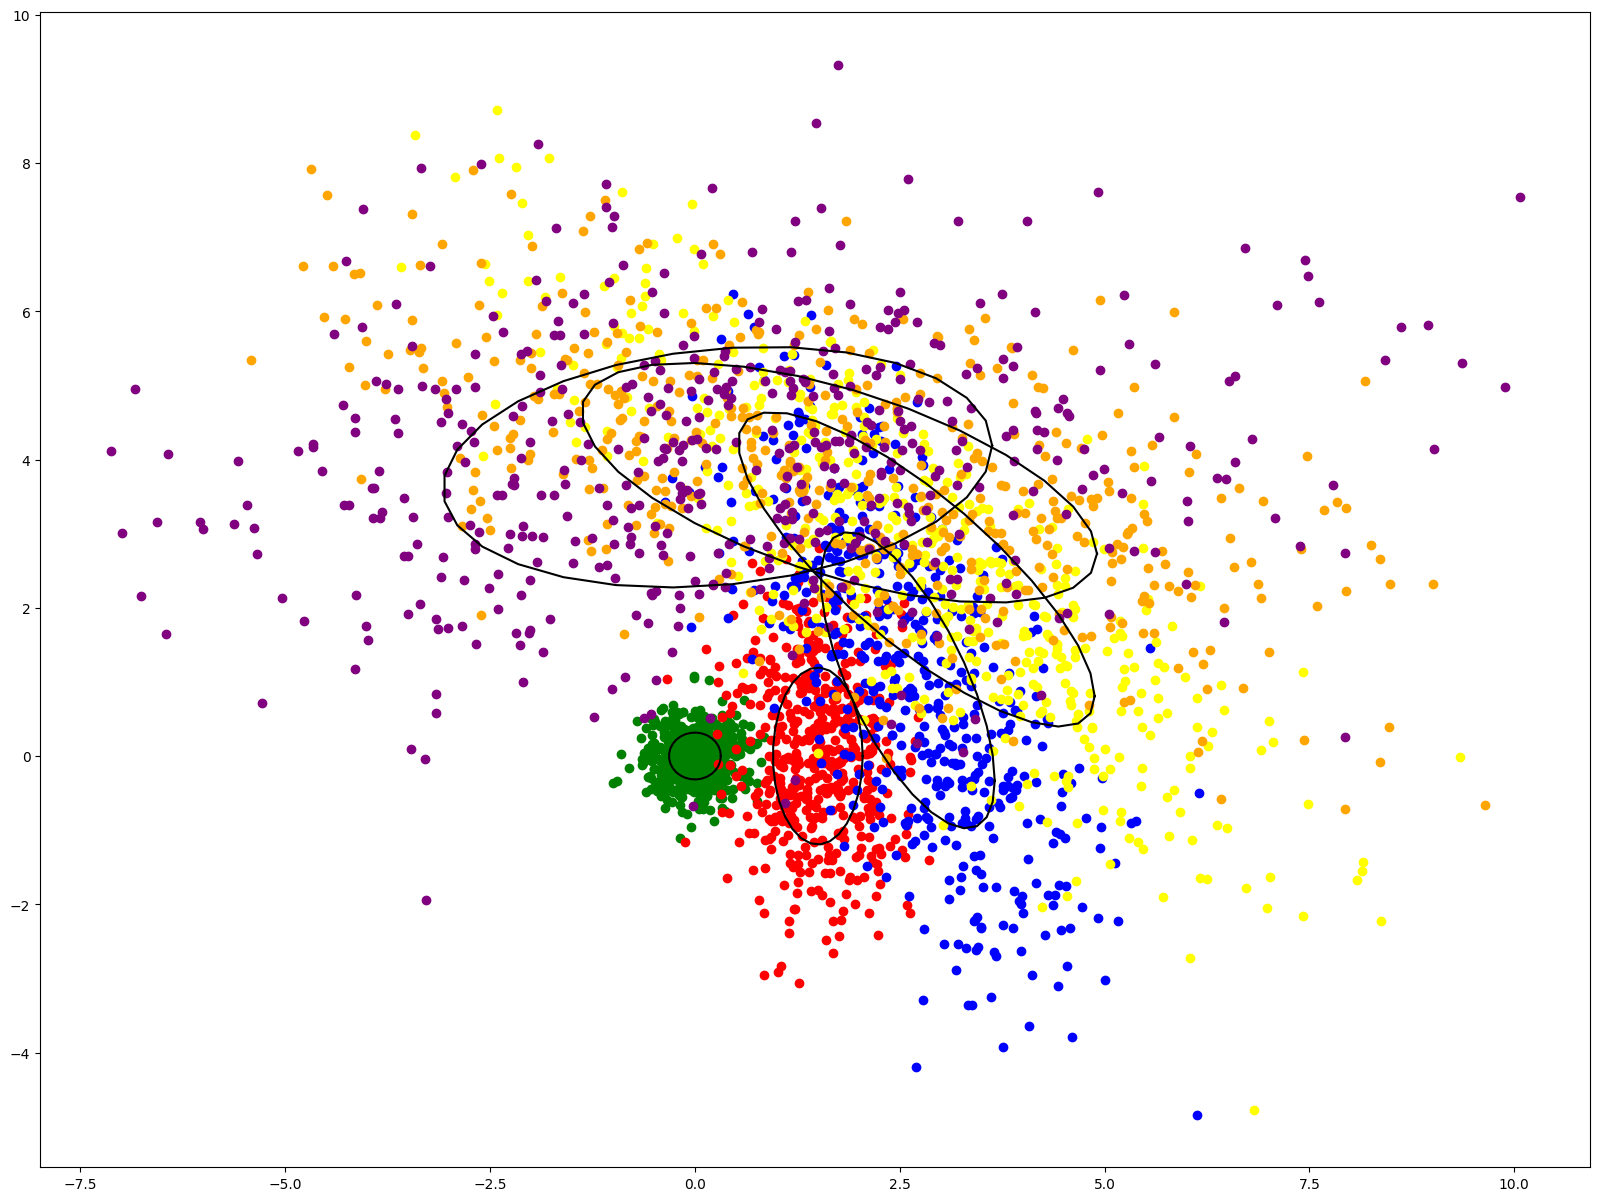

In [33]:
# Propagation
for i in range(1, 6):
    noise_sample = np.random.multivariate_normal(mean_noise, cov_noise)
    B_num = compute_num(B,(deltat, theta), (dt, mean_prop[i-1, 2]))
    mean_prop[i] = A @ mean_prop[i-1] + B_num @ u + mean_noise
    J_x_num = compute_num(J_x, (deltat, v, theta), (dt, u[0], mean_prop[i-1, 2]))
    cov_prop[i] = (A + J_x_num) @ cov_prop[i-1] @ (A + J_x_num).T + cov_noise
    
# Plot iso countours
plt.figure(figsize=[20, 15])
colors = ['green', 'red', 'blue', 'yellow', 'orange', 'purple']
for i in range(6):
    # Number of samples = 1000
    y, _, _ = draw_samples_and_plot(mean_prop[i, :2], cov_prop[i, :2, :2], False, 500)
    plot2dcov(mean_prop[i, :2], cov_prop[i, :2, :2], 1, color='black')
    plt.scatter(y[:, 0], y[:, 1], color=colors[i], label='data')
plt.show()

### F.

In [34]:
n_v, n_w= sympy.symbols('n_v n_w')
theta, v, w, x, y, deltat= sympy.symbols('theta v w x y \delta{t}')

A = sympy.Matrix([  [1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]])

mean_X_0 = np.array((0, 0, 0))

cov_X_0 = np.array([ [0.1, 0, 0],
                     [0, 0.1, 0],
                     [0, 0, 0.5] ])

X = sympy.Matrix((x, y, theta))

u = sympy.Matrix((v, w))

dt = 0.5  

B = sympy.Matrix([  [sympy.cos(theta)*deltat, 0],    
                    [sympy.sin(theta)*deltat, 0],
                    [0, deltat] ])

nu = sympy.Matrix((n_v, n_w))

mean_noise = np.array((0, 0))

cov_noise = np.array([ [0.2, 0],
                       [0, 0.1] ])

J_x = jacobian(A*X + B*u + B*nu, X)

J_nu = jacobian(A*X + B*u + B*nu, nu)

# Propagate mean
# Define data structure for the state propagation
mean_prop = np.zeros((6, 3))
mean_prop[0] = mean_X_0

cov_prop = np.zeros((6, 3, 3))
cov_prop[0] = cov_X_0

u = np.array((3, 1.5))

# Numerical A
A = compute_num(A,(), ())

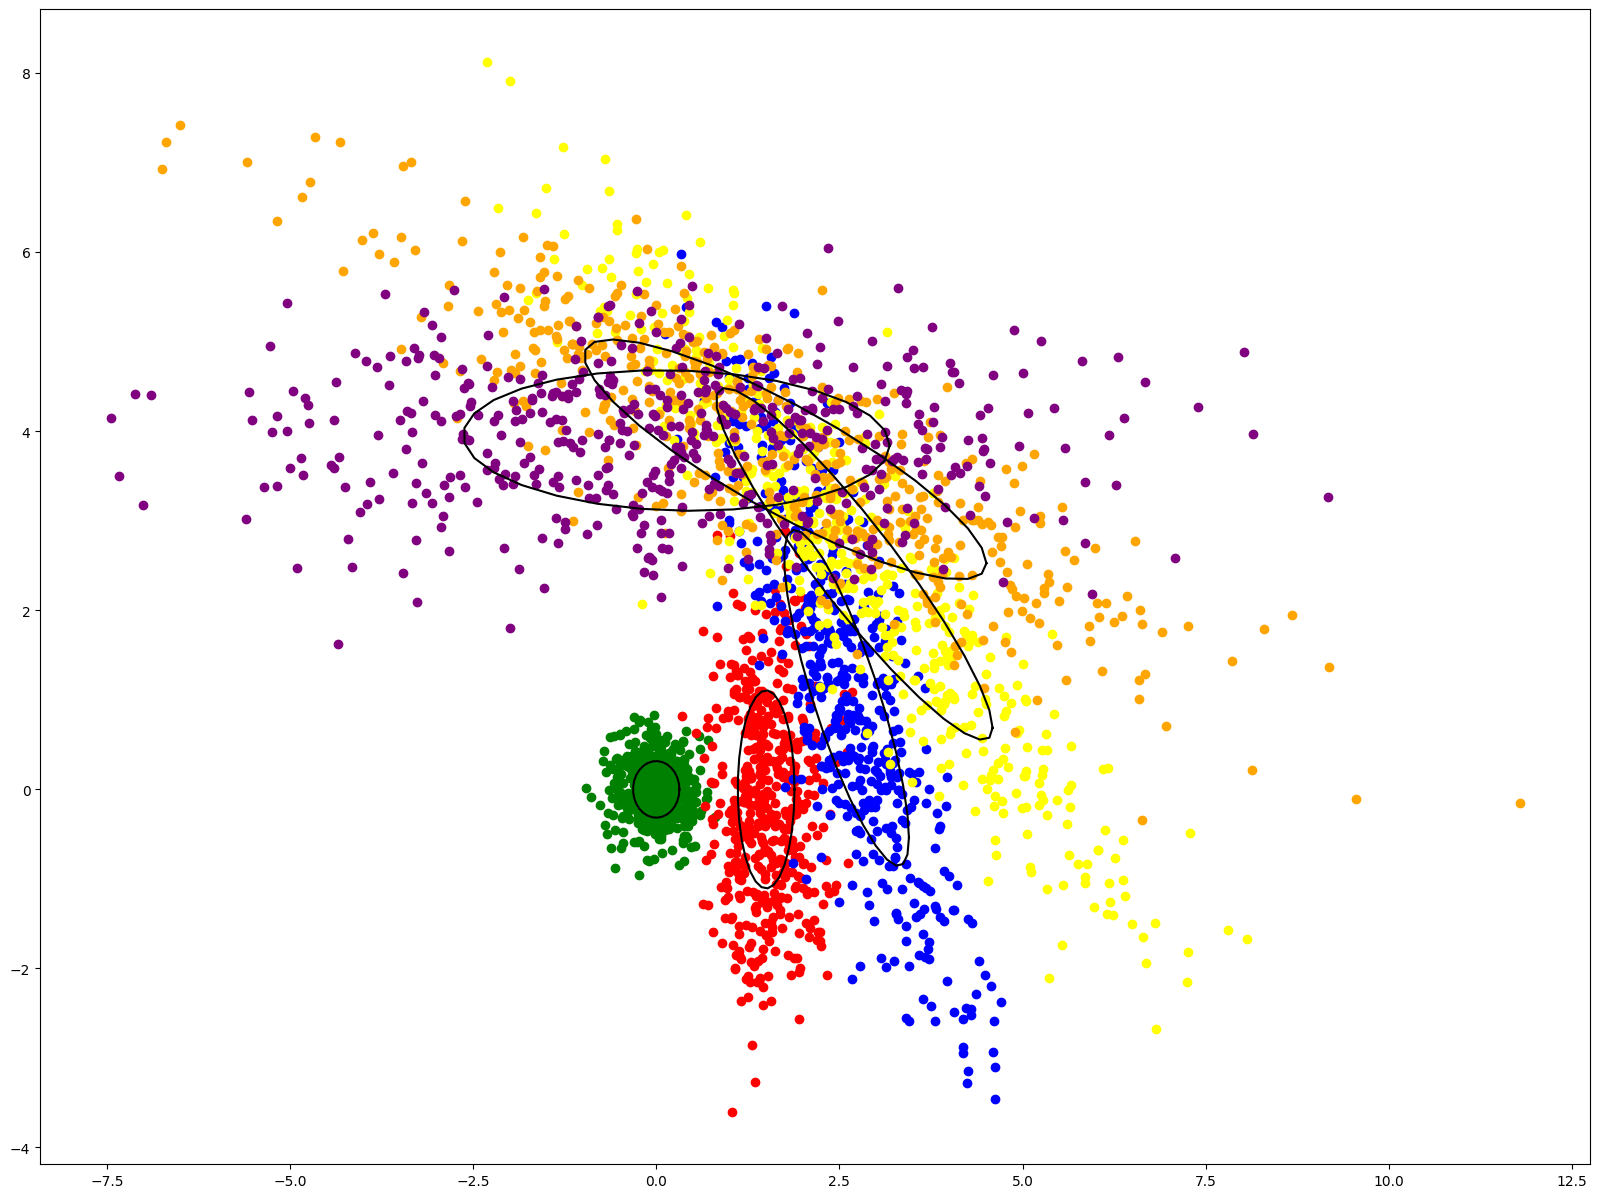

In [35]:
# Propagation
for i in range(1, 6):
    noise_sample = np.random.multivariate_normal(mean_noise, cov_noise)
    B_num = compute_num(B,(deltat, theta), (dt, mean_prop[i-1, 2]))
    mean_prop[i] = A @ mean_prop[i-1] + B_num @ u + B_num @ mean_noise
    J_x_num = compute_num(J_x, (deltat, v, theta, n_v), (dt, u[0], mean_prop[i-1, 2], mean_noise[0]))
    J_nu_num = compute_num(J_nu, (deltat, theta), (dt, mean_prop[i-1, 2]))
    cov_prop[i] = J_x_num @ cov_prop[i-1] @ J_x_num.T + J_nu_num @ cov_noise @ J_nu_num.T

# Plot iso countours
plt.figure(figsize=[20, 15])
colors = ['green', 'red', 'blue', 'yellow', 'orange', 'purple']
for i in range(6):
    # Number of samples = 1000
    y, _, _ = draw_samples_and_plot(mean_prop[i, :2], cov_prop[i, :2, :2], False, 500)
    plot2dcov(mean_prop[i, :2], cov_prop[i, :2, :2], 1, color='black')
    plt.scatter(y[:, 0], y[:, 1], color=colors[i], label='data')
plt.show()

### Comment: covariance of such model (when noise is expressed in the action space) is less than in previous example (noise expressed in the state space)